# Description

### Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors. 

### Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. 
Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

Age of the patient 

Gender of the patient 

Total Bilirubin 

Direct Bilirubin 

Alkaline Phosphotase 

Alamine Aminotransferase 

Aspartate Aminotransferase 

Total Protiens 

Albumin 

Albumin and Globulin Ratio 

Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

### Inspiration

Use these patient records to determine which patients have liver disease and which ones do not.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st 
import os
from tqdm import tqdm
os.chdir('D:\Shashi Katteri\Desktop\data sets to work on\indian-liver-patient-records')

In [29]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [91]:
df1=df
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [64]:
df1['Dataset']=df1['Dataset'].apply(lambda x:0 if x==2 else x)

In [65]:
df1.Dataset.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [66]:
df1=df1.fillna(method='bfill')

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


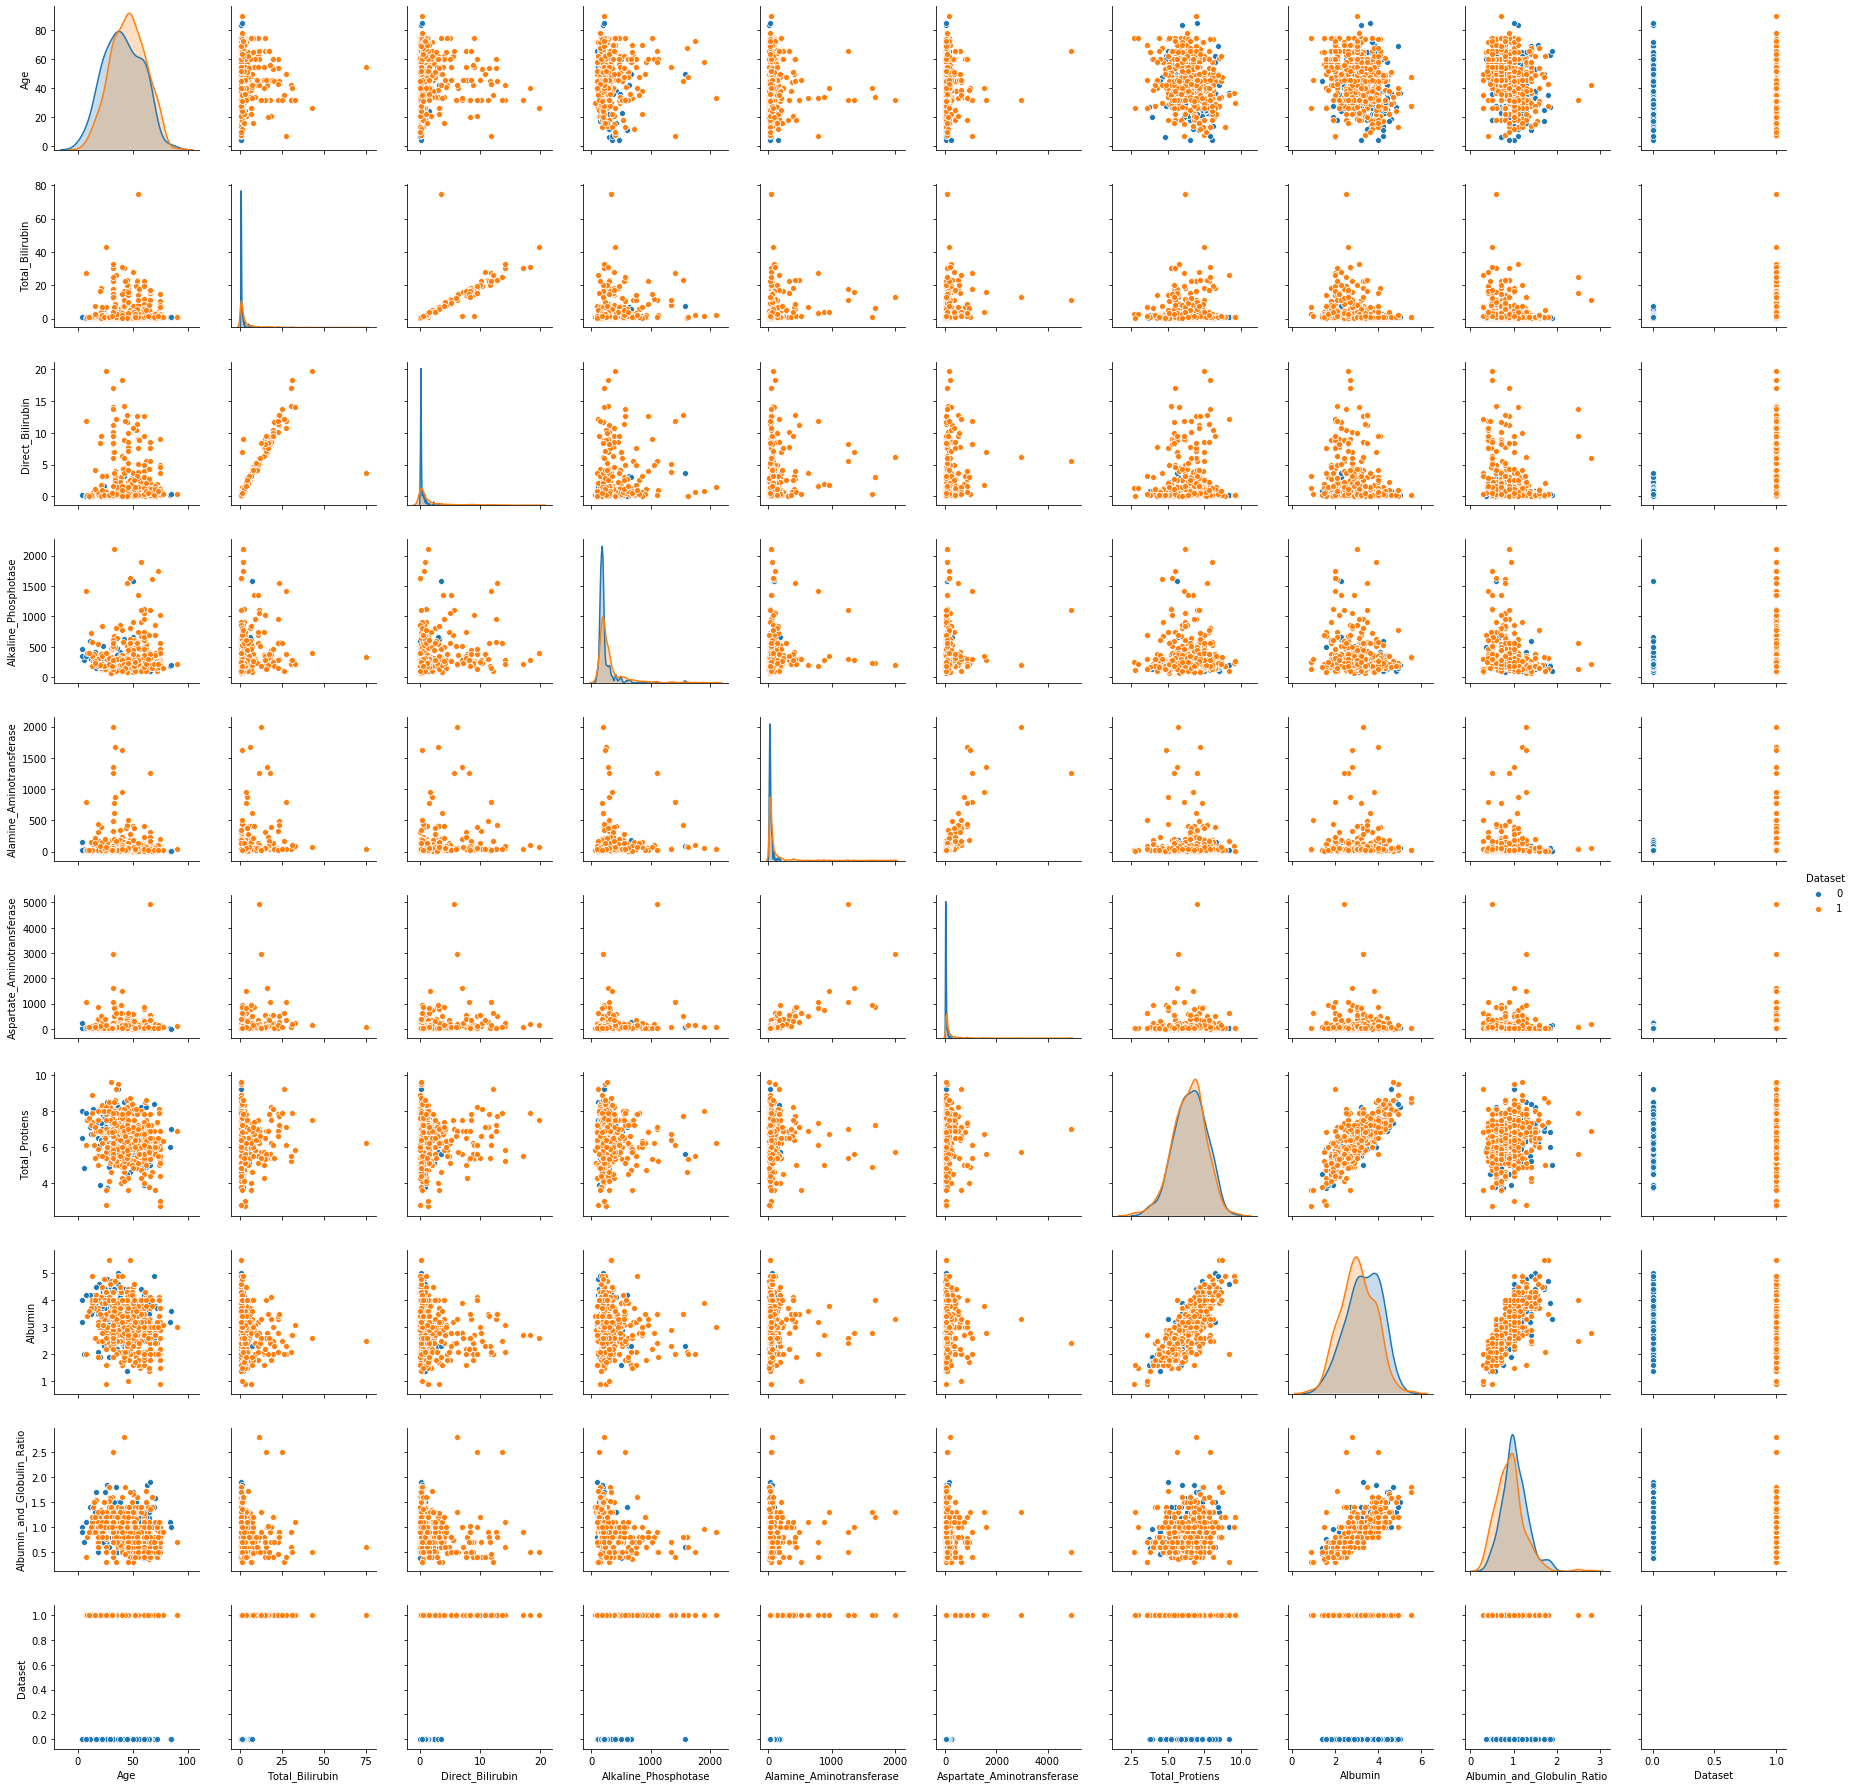

In [39]:
sns.pairplot(data=df1,diag_kind='kde',hue='Dataset')

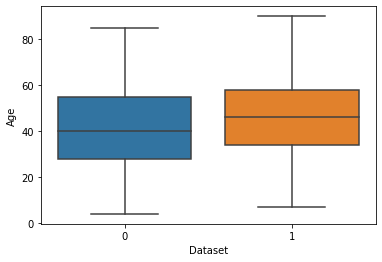

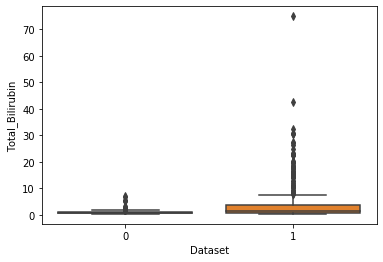

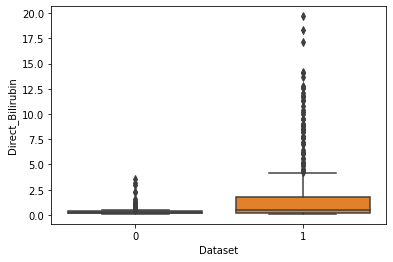

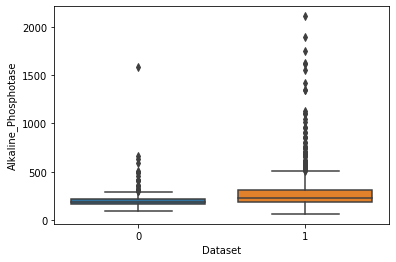

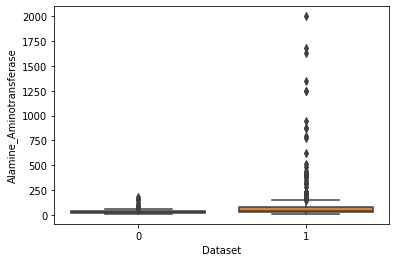

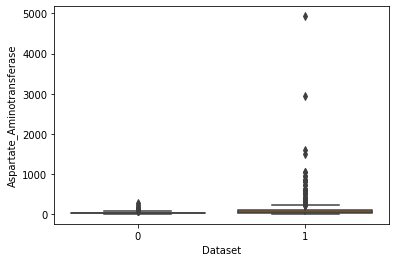

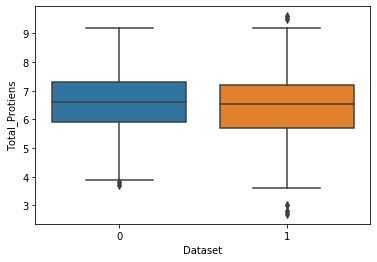

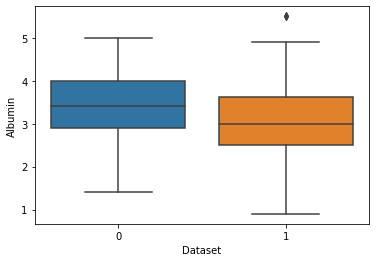

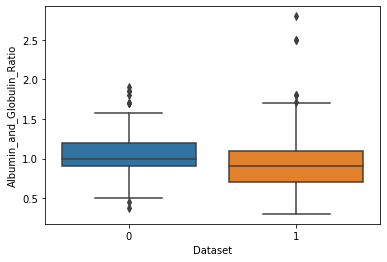

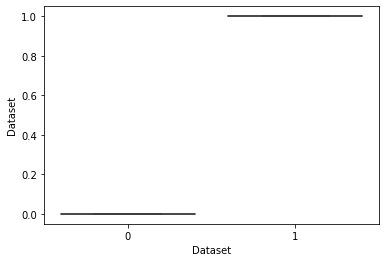

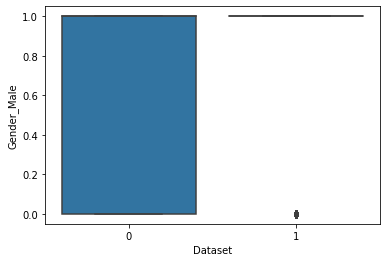

In [80]:
for i in df1.columns:
    sns.boxplot(y=df1[i],x=df1['Dataset'])
    plt.show()

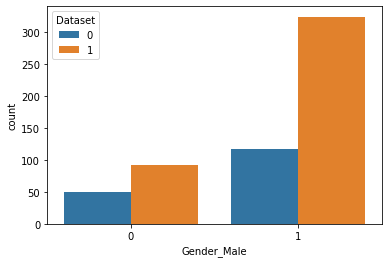

In [83]:
sns.countplot(df1['Gender_Male'],hue=df1['Dataset'])

In [90]:
df1.groupby('Gender_Male').describe().T

Gender_Male             0           1
Age     count  142.000000  441.000000
        mean    43.133803   45.265306
        std     15.899163   16.266108
        min      7.000000    4.000000
        25%     31.000000   33.000000
...                   ...         ...
Dataset min      0.000000    0.000000
        25%      0.000000    0.000000
        50%      1.000000    1.000000
        75%      1.000000    1.000000
        max      1.000000    1.000000

[80 rows x 2 columns]

In [40]:
df1.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.218511,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207954,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201974,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.236543,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.004714,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.071585,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233764,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.688138,-0.161388
Albumin_and_Globulin_Ratio,-0.218511,-0.207954,-0.201974,-0.236543,-0.004714,-0.071585,0.233764,0.688138,1.000000,-0.166694
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.166694,1.000000


In [68]:
df1=pd.get_dummies(df1,columns=['Gender'],drop_first=True)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
Gender_Male                   583 non-null uint8
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [45]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score

In [70]:
x=df1.drop('Dataset',axis=1)
y=df1['Dataset']

In [76]:
def mod_score(algo,x,y,params=None):
    cv1=cross_val_score(algo,x,y,cv=5,scoring='accuracy')
    cv2=cross_val_score(algo,x,y,cv=5,scoring='roc_auc')
    print('Accuracy : ',cv1.mean())
    print('ROC AUC score : ',cv2.mean())
    
    

In [137]:
def rand_search(algo,params,x,y):
    rs=RandomizedSearchCV(algo,param_distributions=params,random_state=0,n_jobs=-1,n_iter=100,scoring='roc_auc',cv=10)
    mod=rs.fit(x,y)
    print(mod.best_score_)
    return mod.best_params_

In [53]:
rfc_params={'n_estimators':st.randint(50,300),
    'criterion':['gini','entropy'],
    'max_depth':st.randint(2,20),
    'min_samples_split':st.randint(2,100),
    'min_samples_leaf':st.randint(2,100)}
lgb_params={ 'num_leaves':st.randint(31,60),
   'max_depth':st.randint(2,20),
    'learning_rate':st.uniform(0,1),
    'n_estimators':st.randint(50,300),
    'min_split_gain':st.uniform(0,0.3)}

In [71]:
rbp=rand_search(RandomForestClassifier(),rfc_params)

0.7475276696044271


In [73]:
lbp=rand_search(LGBMClassifier(),lgb_params)

0.7393640687982511


In [74]:
models={'Logistic Regression':LogisticRegression(solver='liblinear'),'Random Forest':RandomForestClassifier(**rbp),
       'Light GBM(Boosting)':LGBMClassifier(**lbp),'Gausian Naive Bayes':GaussianNB()
       }
params={'Logistic Regression':{'solver':'liblinear'},'Random Forest':rbp,
       'Light GBM(Boosting)':lbp,'Gausian Naive Bayes':None}

In [78]:
for i in models.keys():
    print(i,'\n')
    mod_score(models[i],x,y)
    print('\n')

Logistic Regression 

Accuracy :  0.7153109342764516
ROC AUC score :  0.7551955722047856


Random Forest 

Accuracy :  0.7083554376657825
ROC AUC score :  0.7375423773014135


Light GBM(Boosting) 

Accuracy :  0.6793103448275863
ROC AUC score :  0.7129627754716343


Gausian Naive Bayes 

Accuracy :  0.5661508989095196
ROC AUC score :  0.7368733911965663




In [93]:
rfc=RandomForestClassifier(**rbp)
mod=rfc.fit(x,y)
y=mod.feature_importances_

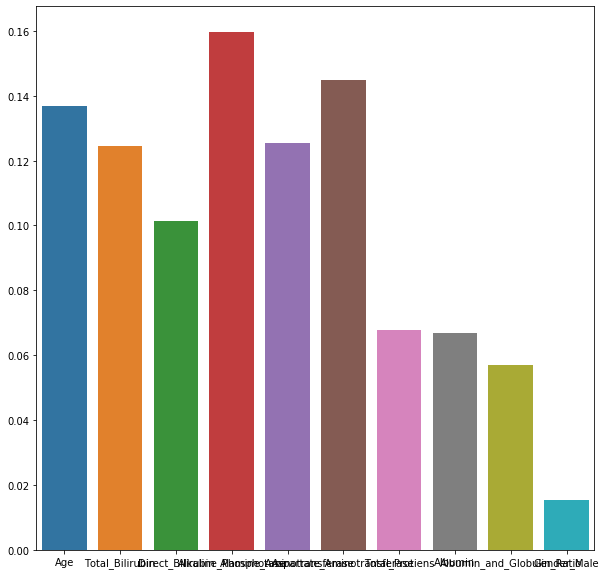

In [96]:
plt.figure(figsize=(10,10))
sns.barplot(y=y,x=x.columns)

# Feature engineering

In [120]:
df3=df1

In [122]:
df3=pd.get_dummies(df3,columns=['Gender'],drop_first=True)
df3=df3.fillna(method='bfill')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
Gender_Male                   583 non-null uint8
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [131]:
d=df3
ss=StandardScaler()
d=ss.fit_transform(df3)
df3['sum']=d.sum(axis=1)
df3['min']=d.min(axis=1)
df3['max']=d.max(axis=1)
df3['skew']=st.skew(d,axis=1)
df3['kurt']=st.kurtosis(d,axis=1)
df3['std']=d.std(axis=1)

In [132]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 17 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
Gender_Male                   583 non-null uint8
sum                           583 non-null float64
min                           583 non-null float64
max                           583 non-null float64
skew                          583 non-null float64
kurt                          583 non-null float64
std                           583 non-null float64
dtypes: float64(11), int64(5), uint8(1)


In [139]:
x1=df3.drop('Dataset',axis=1)
y=df3['Dataset']

In [140]:
rbp1=rand_search(RandomForestClassifier(),rfc_params,x1,y)

0.9840487719478036


In [141]:
lbp1=rand_search(LGBMClassifier(),lgb_params,x1,y)

0.9917661576825851


In [142]:
models1={'Logistic Regression':LogisticRegression(solver='liblinear'),'Random Forest':RandomForestClassifier(**rbp1),
       'Light GBM(Boosting)':LGBMClassifier(**lbp1),'Gausian Naive Bayes':GaussianNB()
       }
params={'Logistic Regression':{'solver':'liblinear'},'Random Forest':rbp,
       'Light GBM(Boosting)':lbp,'Gausian Naive Bayes':None}

In [143]:
for i in models1.keys():
    print(i,'\n')
    mod_score(models1[i],x1,y)
    print('\n')

Logistic Regression 

Accuracy :  0.8800176834659593
ROC AUC score :  0.9440352190529371


Random Forest 

Accuracy :  0.9297229590333039
ROC AUC score :  0.9848353434108217


Light GBM(Boosting) 

Accuracy :  0.9434423813734159
ROC AUC score :  0.9862679135180906


Gausian Naive Bayes 

Accuracy :  0.7221780135573239
ROC AUC score :  0.8396386155776658




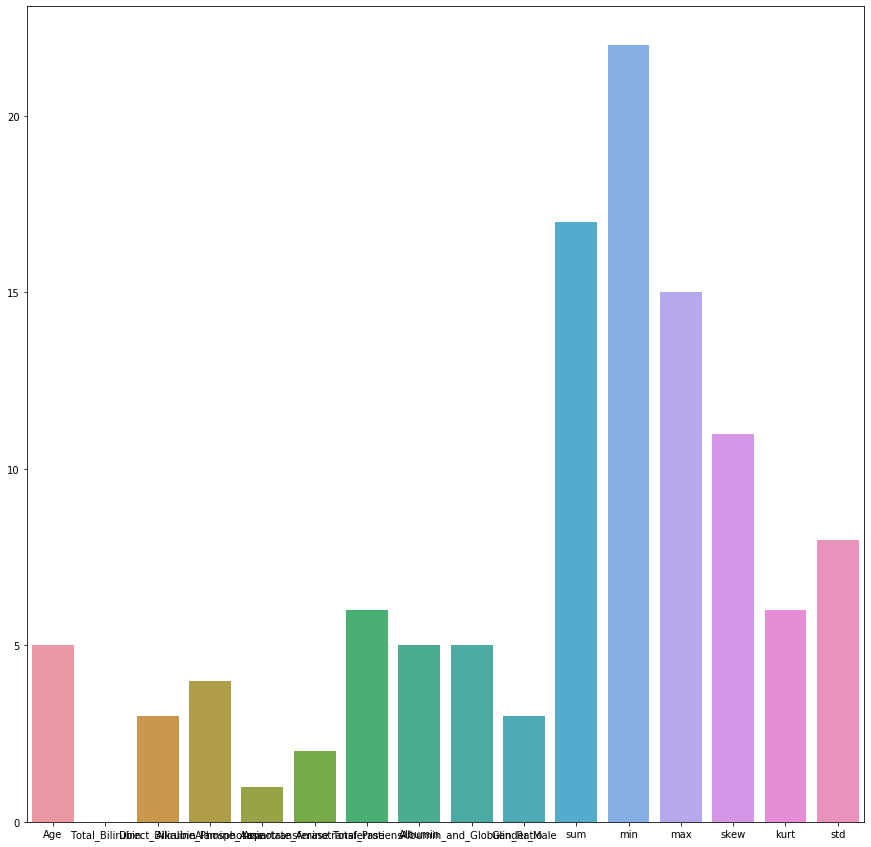

In [147]:
lgb=LGBMClassifier(**lbp1)
mod=lgb.fit(x1,y)
f=mod.feature_importances_
plt.figure(figsize=(15,15))
sns.barplot(y=f,x=x1.columns)